# use wine data to predict its quality
win condition i set is to predicted with 90% correct rate

## load data and packages

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Import Tree Ensemble algos
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import roc_curve, roc_auc_score
#roc_auc_score(y, pred)

## examine data and didnt find much to revise

In [3]:
df = pd.read_csv('/Users/alex/Desktop/EDS/Capstone/winequality/winequality-red.csv')

In [7]:
df = pd.read_csv('/Users/alex/Desktop/EDS/Capstone/winequality/winequality-red.csv', sep=';')

In [9]:
df.shape

(1599, 12)

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

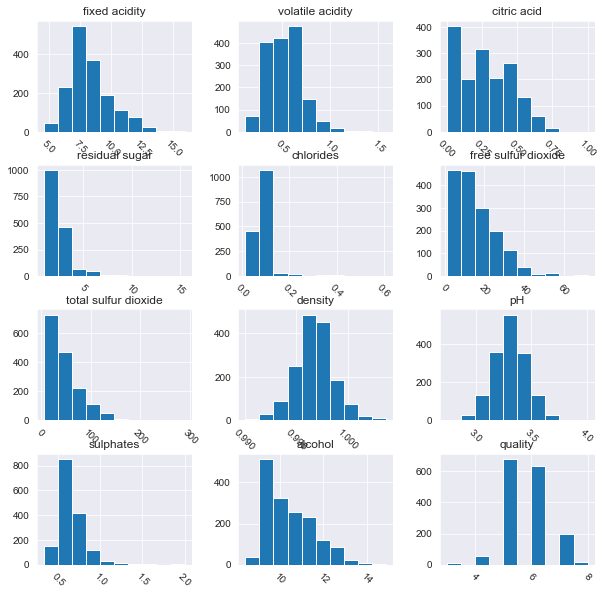

In [21]:
df.hist(figsize=(10,10), xrot=-45)
plt.show()

In [22]:
df.dtypes #all numeric with no missing

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

array([5, 6, 7, 4, 8, 3])

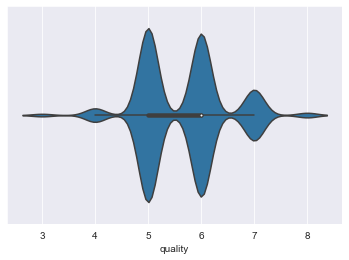

In [25]:
sns.violinplot(x=df.quality)
df.quality.unique()

## split data, pipelines and modeal hyperparameters, set all 5 models

In [29]:
X = df.drop('quality', axis=1)
y = df.quality

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                            test_size=0.2, 
                                                random_state=1234, stratify =y)

In [72]:
print(X_train.shape)
print(y_test.shape)

(1279, 11)
(320,)


In [ ]:
X_test_new = scaler.transform(X_test)

In [73]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)), 
    'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf': make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123)),
}


In [107]:
# set hyperparameters
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}
#need to be dict!!!
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}
rf_hyperparameters = { 
    'randomforestregressor__n_estimators': [100, 200],
    'randomforestregressor__max_features': ['auto','log2', 'sqrt', 0.33],
    'randomforestregressor__max_depth': [None, 5, 3, 1]
}
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [108]:
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

In [109]:
for key, value in pipelines.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [110]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


## tuning hyperparameters

In [111]:
fitted_model={}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], n_jobs=-1, cv=10)
    
    model.fit(X_train, y_train)
    fitted_model[name] = model
    
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [112]:
fitted_model

{'lasso': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('lasso', Lasso(random_state=123))]),
              n_jobs=-1,
              param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1,
                                           5, 10]}),
 'ridge': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('ridge', Ridge(random_state=123))]),
              n_jobs=-1,
              param_grid={'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1,
                                           5, 10]}),
 'enet': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('elasticnet',
                                         ElasticNet(random_state=123))]),
              n_jobs=-1,
              param_grid={'elasticnet__alpha': 

## select best method

In [113]:

for name, model in fitted_model.items():
    print(name, model.best_params_ )

lasso {'lasso__alpha': 0.01}
ridge {'ridge__alpha': 10}
enet {'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.9}
rf {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__n_estimators': 200}
gb {'gradientboostingregressor__learning_rate': 0.05, 'gradientboostingregressor__max_depth': 5, 'gradientboostingregressor__n_estimators': 200}


## RF is the best model
 Now fit all models to the test data to calculate MAE and R square

## predict(X) in GridSearchCV Call predict on the estimator with the best found parameters.

In [114]:
for name, model in fitted_model.items():
    y_predict = model.predict(X_test)
    print(y_predict.mean())
    print(name)
    print('MAE', mean_absolute_error(y_test, y_predict))
    print('MSE', mean_squared_error(y_test, y_predict))
    print('R2', r2_score(y_test, y_predict))
    print('-----------')

5.656920521009069
lasso
MAE 0.5115777755086934
MSE 0.43408289312811155
R2 0.32728845183850985
-----------
5.660103128762153
ridge
MAE 0.5117439308282067
MSE 0.43695237236572754
R2 0.32284153201993915
-----------
5.657224527411688
enet
MAE 0.5115241837292808
MSE 0.434305858522368
R2 0.32694291554133903
-----------
5.667734375
rf
MAE 0.414546875
MSE 0.321944609375
R2 0.5010725830861432
-----------
5.669162953086479
gb
MAE 0.43326228786470794
MSE 0.3357576979937059
R2 0.47966601679043097
-----------


In [115]:
y_predict = np.round(fitted_model['rf'].predict(X_test))
compare_df = pd.DataFrame({'y':y_test, 'y_predicted': y_predict})
compare_df['error']=abs(compare_df.y_predicted-compare_df.y )

In [116]:
compare_df.error.sum()/len(compare_df.error)

0.328125

In [117]:
compare_df

,y,y_predicted,error
1175,6,6.0,0.0
419,5,5.0,0.0
200,7,6.0,1.0
440,8,6.0,2.0
1358,5,5.0,0.0
...,...,...,...
1270,6,7.0,1.0
1269,8,7.0,1.0
716,5,5.0,0.0
888,6,6.0,0.0


## beating the online one by tunning moe hyperparamenters and more models!
https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn
## note they only reported MSE

In [119]:
import pickle
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_model['rf'], f)